In [1]:
# Importing necessary libraries
import pandas as pd

# Loading the coffee dataset from the uploaded CSV file
coffee_data = pd.read_csv('/content/index (1).csv')

# Displaying the head of the dataframe to understand its structure
coffee_data.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


<ipython-input-2-dc3eab29e529>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coffee_sales, x='coffee_name', y='money', palette='viridis')


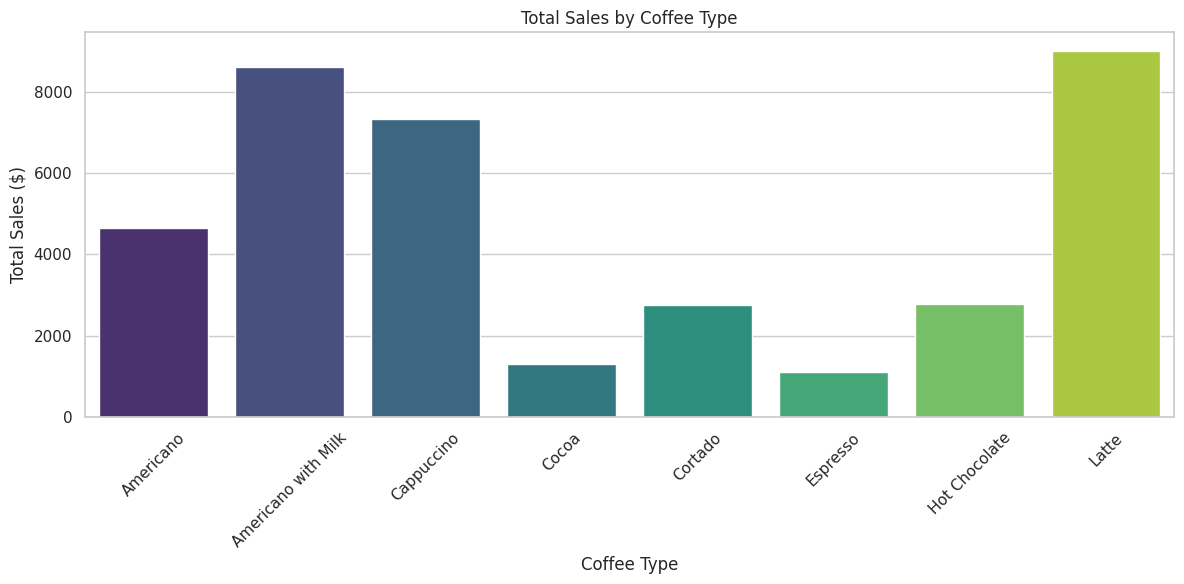

In [2]:
# Importing necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for the plots
sns.set(style='whitegrid')

# Converting the 'datetime' column to datetime type for better handling
coffee_data['datetime'] = pd.to_datetime(coffee_data['datetime'])

# Extracting the date from the datetime for grouping
coffee_data['date'] = coffee_data['datetime'].dt.date

# Grouping the data by coffee name and summing the money spent
coffee_sales = coffee_data.groupby('coffee_name')['money'].sum().reset_index()

# Creating a bar plot for total sales by coffee type
plt.figure(figsize=(12, 6))
sns.barplot(data=coffee_sales, x='coffee_name', y='money', palette='viridis')
plt.title('Total Sales by Coffee Type')
plt.xlabel('Coffee Type')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

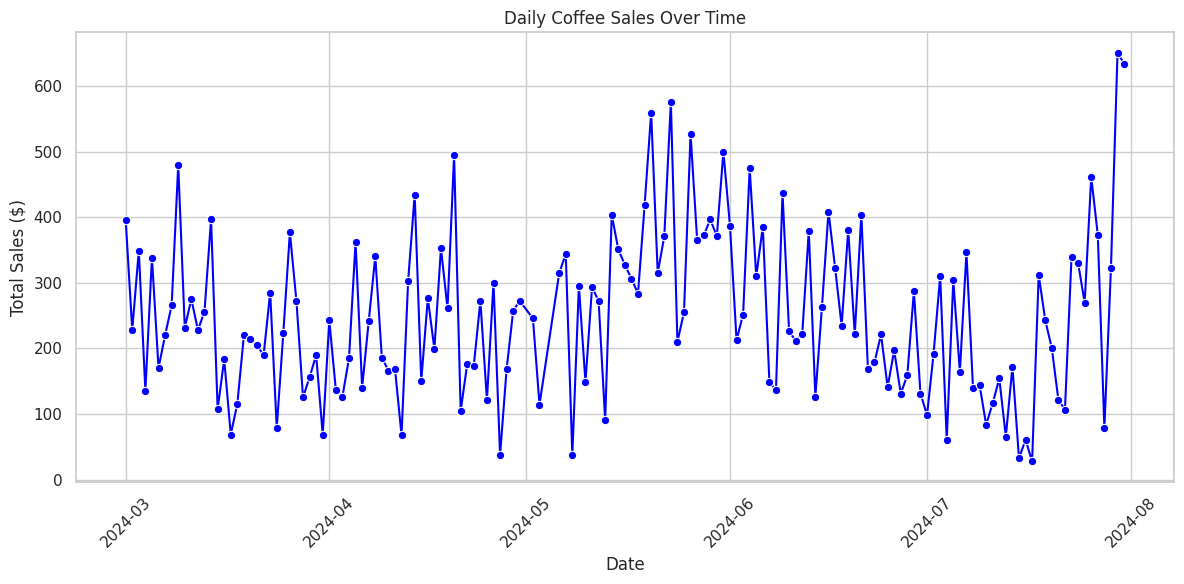

In [3]:
# Grouping the data by date and summing the money spent to analyze daily sales
daily_sales = coffee_data.groupby('date')['money'].sum().reset_index()

# Creating a line plot for daily sales over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_sales, x='date', y='money', marker='o', color='blue')
plt.title('Daily Coffee Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-4-a2f2104a0b66>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coffee_counts, x='coffee_name', y='count', palette='magma')


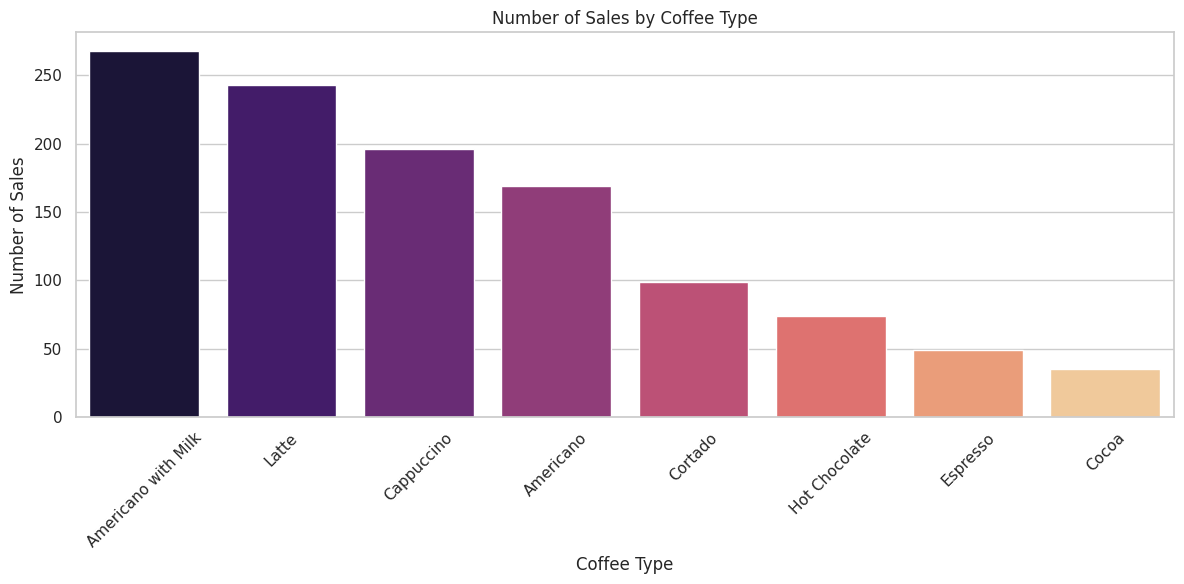

In [4]:
# Analyzing the number of sales for each coffee type
coffee_counts = coffee_data['coffee_name'].value_counts().reset_index()
coffee_counts.columns = ['coffee_name', 'count']

# Creating a bar plot for the number of sales by coffee type
plt.figure(figsize=(12, 6))
sns.barplot(data=coffee_counts, x='coffee_name', y='count', palette='magma')
plt.title('Number of Sales by Coffee Type')
plt.xlabel('Coffee Type')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

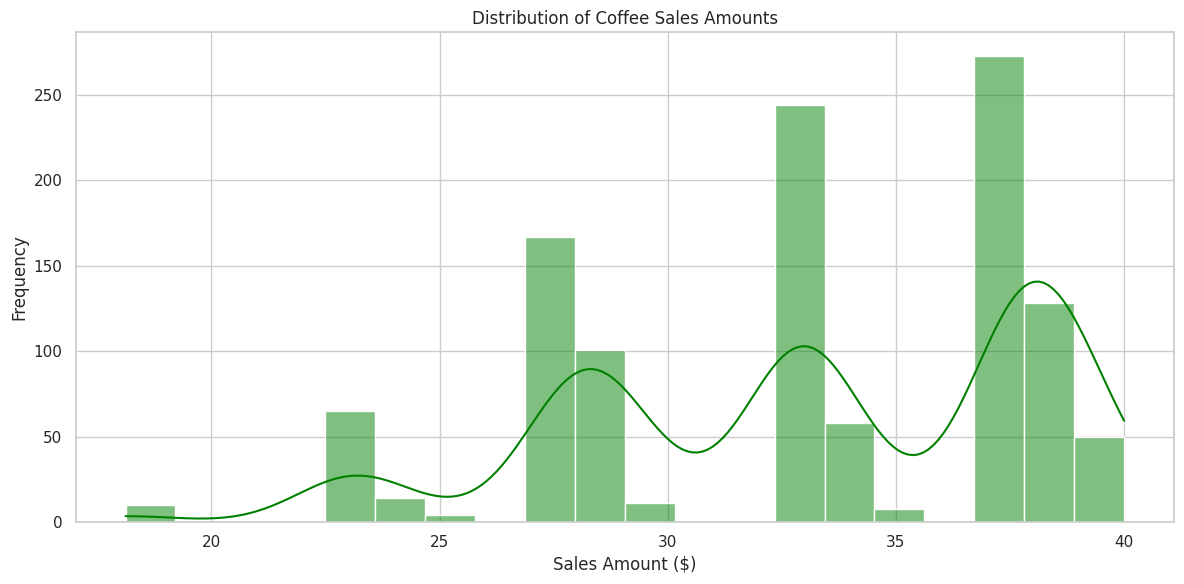

In [5]:
# Creating a histogram to visualize the distribution of sales amounts
plt.figure(figsize=(12, 6))
sns.histplot(coffee_data['money'], bins=20, kde=True, color='green')
plt.title('Distribution of Coffee Sales Amounts')
plt.xlabel('Sales Amount ($)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [6]:
# Calculating the average sales amount per transaction
average_sales = coffee_data['money'].mean()
average_sales

np.float64(33.10580759046779)

<ipython-input-7-6f646c415e36>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=payment_method_sales, x='cash_type', y='money', palette='coolwarm')


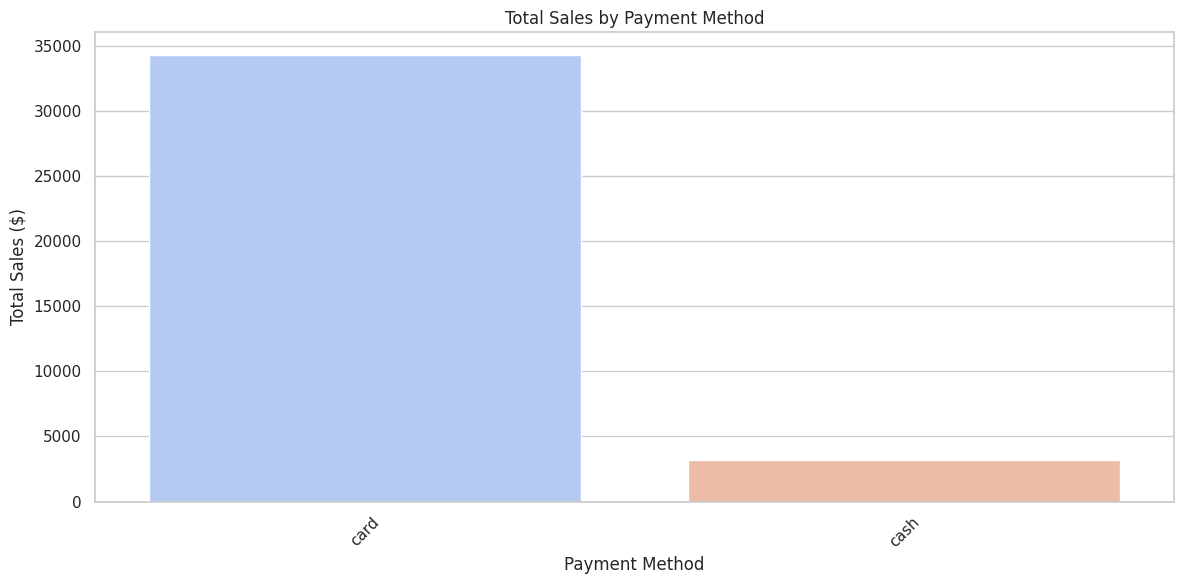

In [7]:
# Grouping the data by cash type and summing the money spent
payment_method_sales = coffee_data.groupby('cash_type')['money'].sum().reset_index()

# Creating a bar plot for total sales by payment method
plt.figure(figsize=(12, 6))
sns.barplot(data=payment_method_sales, x='cash_type', y='money', palette='coolwarm')
plt.title('Total Sales by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-9-a178567bd217>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hourly_sales, x='hour', y='money', palette='plasma')


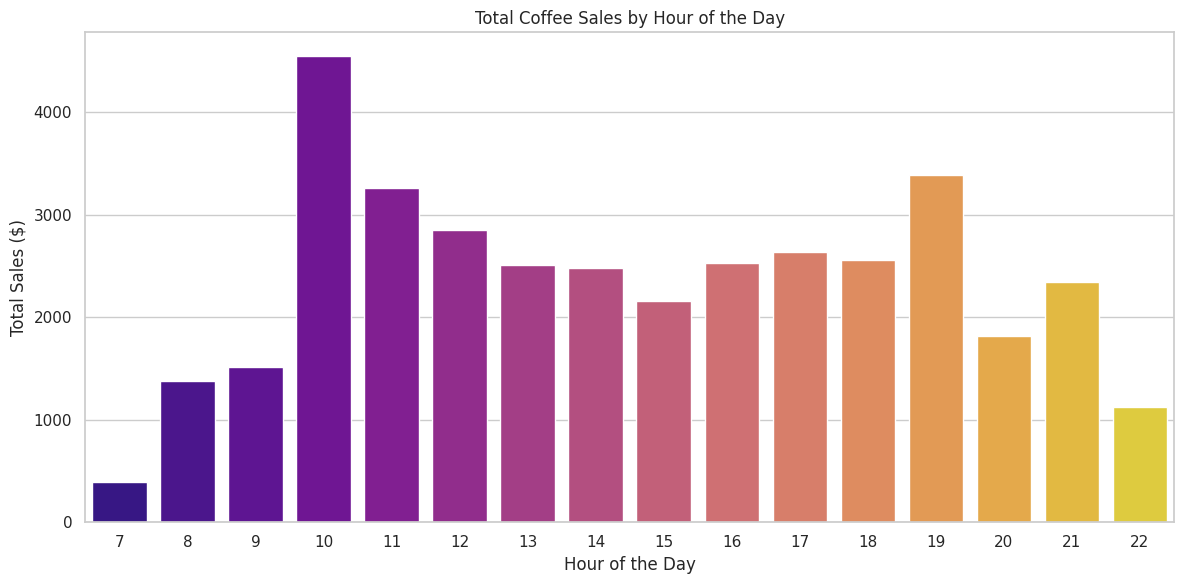

In [9]:
# Extracting the hour from the datetime column
coffee_data['hour'] = coffee_data['datetime'].dt.hour

# Grouping the data by hour and summing the money spent
hourly_sales = coffee_data.groupby('hour')['money'].sum().reset_index()

# Creating a bar plot for total sales by hour of the day
plt.figure(figsize=(12, 6))
sns.barplot(data=hourly_sales, x='hour', y='money', palette='plasma')
plt.title('Total Coffee Sales by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

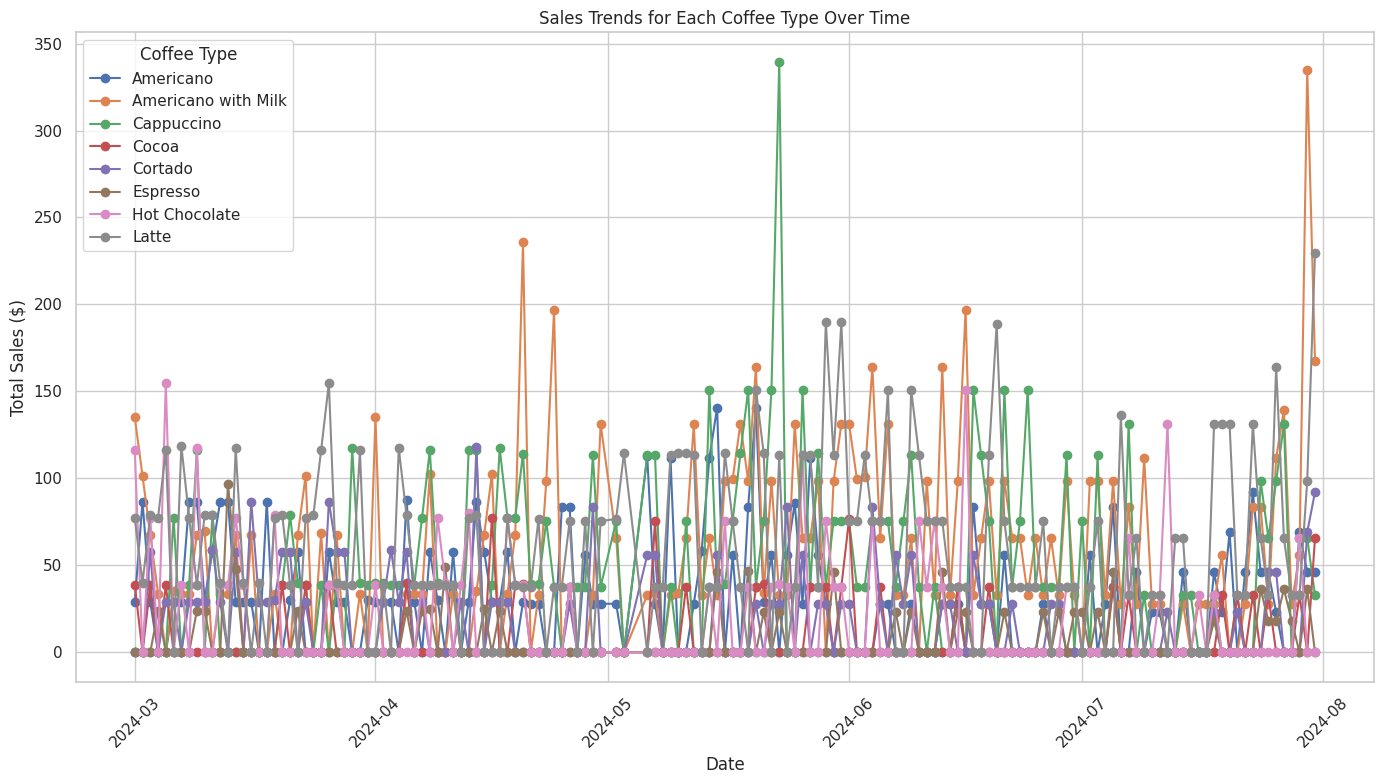

In [8]:
# Grouping the data by date and coffee name, then summing the money spent
coffee_trends = coffee_data.groupby(['date', 'coffee_name'])['money'].sum().unstack().fillna(0)

# Creating a line plot for sales trends of each coffee type over time
plt.figure(figsize=(14, 8))
for coffee in coffee_trends.columns:
    plt.plot(coffee_trends.index, coffee_trends[coffee], marker='o', label=coffee)
plt.title('Sales Trends for Each Coffee Type Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.legend(title='Coffee Type')
plt.tight_layout()
plt.show()